<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

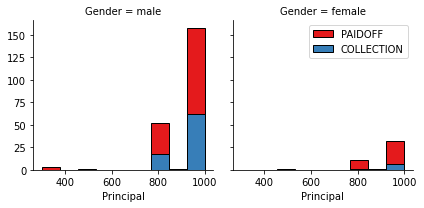

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

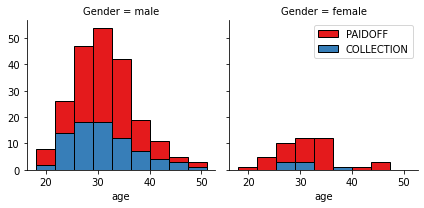

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


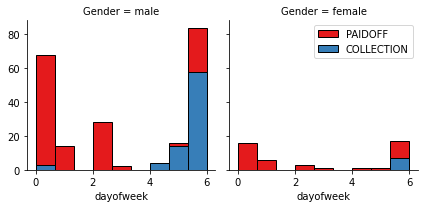

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [16]:
X = Feature
print(X.shape)
X[0:5]

(346, 8)


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y_train = df['loan_status'].values
print(y_train.shape)
y_train[0:5]

(346,)


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X_train = preprocessing.StandardScaler().fit(X).transform(X)
X_train[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
# Libraries importation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
# Dataset split into training and test sets to find the best k
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
print (f'X train set: {X_train_knn.shape}; Y train set: {y_train_knn.shape}')
print (f'X test set: {X_test_knn.shape}; Y test set: {y_test_knn.shape}')

X train set: (276, 8); Y train set: (276,)
X test set: (70, 8); Y test set: (70,)


In [22]:
# k optimization

Ks = 11
mean_vector = np.zeros((Ks-1))
std_vector = np.zeros((Ks-1))

for n in range(1, Ks):
    
    # Train model and predict  
    classifier_knn_opt = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn,y_train_knn)
    predictions_knn_opt = classifier_knn_opt.predict(X_test_knn)
    
    # Calculation of accuracy score
    mean_vector[n-1] = metrics.accuracy_score(y_test_knn, predictions_knn_opt)
    std_vector[n-1]=np.std(predictions_knn_opt==y_test_knn)/np.sqrt(predictions_knn_opt.shape[0])

mean_vector

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.68571429])

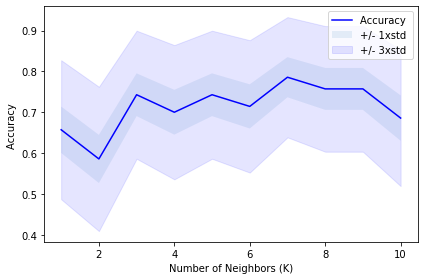

In [23]:
# Plot of model accucary for differents ks
plt.plot(range(1,Ks),mean_vector,'b')
plt.fill_between(range(1,Ks),mean_vector - 1 * std_vector,mean_vector + 1 * std_vector, alpha=0.10)
plt.fill_between(range(1,Ks),mean_vector - 3 * std_vector,mean_vector + 3 * std_vector, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In view of the above plot, the highest accuracy is obtained with k = 7. So the final model with the whole original training set (loan_train.csv) is setup with k = 7:

In [24]:
# Optimal KNN Model Setup

# K selection
k = 7

# Modeling 
classifier_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
classifier_knn

KNeighborsClassifier(n_neighbors=7)

# Decision Tree


In [25]:
# Library importation
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Modeling
classifier_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train, y_train)
classifier_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Support Vector Machine


In [27]:
# Library importation
from sklearn import svm

In [81]:
# Modeling
classifier_svm = svm.SVC(kernel='rbf').fit(X_train, y_train)
classifier_svm

SVC()

# Logistic Regression


In [29]:
# Library importation
from sklearn.linear_model import LogisticRegression

In [30]:
# Modeling
classifier_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

# Model Evaluation using Test set


In [31]:
# Libraries importation
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [32]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Load Test set for evaluation


In [69]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [70]:
test_df.tail()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
49,348,348,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
50,349,349,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
51,369,369,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
52,370,370,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male
53,396,396,COLLECTION,1000,30,9/12/2016,10/11/2016,33,High School or Below,male


In [71]:
# Data Wrangling of the Test set 

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

In [72]:
# Definition of X_test
X_test = Feature_test
X_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [73]:
X_test.tail()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
49,1000,30,32,0,1,0,1,0
50,800,15,29,0,1,0,0,1
51,1000,30,37,0,1,0,1,0
52,800,15,36,0,1,0,1,0
53,1000,30,33,0,0,0,1,0


In [74]:
# Checking for NAN values
np.any(np.isnan(X_test))

False

In [75]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Principal             54 non-null     int64
 1   terms                 54 non-null     int64
 2   age                   54 non-null     int64
 3   Gender                54 non-null     int64
 4   weekend               54 non-null     int64
 5   Bechalor              54 non-null     uint8
 6   High School or Below  54 non-null     uint8
 7   college               54 non-null     uint8
dtypes: int64(5), uint8(3)
memory usage: 2.4 KB


In [76]:
# Normalization of X_test
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [77]:
# Definition of y_test
y_test = test_df['loan_status'].values
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Predictions and Accuracy for each Model

In [82]:
# Predictions for all the models
predictions_knn = classifier_knn.predict(X_test)
predictions_tree = classifier_tree.predict(X_test)
predictions_svm = classifier_svm.predict(X_test)
predictions_LR = classifier_LR.predict(X_test)

In [85]:
# Jaccard Score for all the models
print(f'Jaccard Score for KNN: {jaccard_score(y_test, predictions_knn, pos_label = "PAIDOFF"):.3f}')
print(f'Jaccard Score for Decisions Tree: {jaccard_score(y_test, predictions_tree, pos_label = "PAIDOFF"):.3f}')
print(f'Jaccard Score for SVM: {jaccard_score(y_test, predictions_svm, pos_label = "PAIDOFF"):.3f}')
print(f'Jaccard Score for Logistic Regression: {jaccard_score(y_test, predictions_LR, pos_label = "PAIDOFF"):.3f}')

Jaccard Score for KNN: 0.720
Jaccard Score for Decisions Tree: 0.765
Jaccard Score for SVM: 0.722
Jaccard Score for Logistic Regression: 0.741


Thus, according to the Jaccard Score, the Decisions Tree model is the one that offers the highest accuracy.

In [89]:
# F1-score for all the models
print(f'F1-score for KNN: {f1_score(y_test, predictions_knn, pos_label = "PAIDOFF"):.3f}')
print(f'F1-score for Decisions Tree: {f1_score(y_test, predictions_tree, pos_label = "PAIDOFF"):.3f}')
print(f'F1-score for SVM: {f1_score(y_test, predictions_svm, pos_label = "PAIDOFF"):.3f}')
print(f'F1-score for Logistic Regression: {f1_score(y_test, predictions_LR, pos_label = "PAIDOFF"):.3f}')

F1-score for KNN: 0.837
F1-score for Decisions Tree: 0.867
F1-score for SVM: 0.839
F1-score for Logistic Regression: 0.851


Consistently with the results from the Jaccard Score, the Decisions Tree model is the one that offers the highest accuracy according to the F1-score.

In [88]:
# LogLoss for LR model
predictions_LR_prob = classifier_LR.predict_proba(X_test)
print(f'LogLoss for Logistic Regression: {log_loss(y_test, predictions_LR_prob):.3f}')

LogLoss for Logistic Regression: 0.557


Thus, the LogLoss metric suggests that the Linear Regression might not be the best model for classifying the data.

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [92]:
# Final Report
data = {'Algorithm':  ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'],
        'Jaccard': [round(jaccard_score(y_test, predictions_knn, pos_label = "PAIDOFF"),3), 
        round(jaccard_score(y_test, predictions_tree, pos_label = "PAIDOFF"),3), 
        round(jaccard_score(y_test, predictions_svm, pos_label = "PAIDOFF"),3),
        round(jaccard_score(y_test, predictions_LR, pos_label = "PAIDOFF"),3)
        ],
         'F1-score': [round(f1_score(y_test, predictions_knn, pos_label = "PAIDOFF"),3),
         round(f1_score(y_test, predictions_tree, pos_label = "PAIDOFF"),3),
         round(f1_score(y_test, predictions_svm, pos_label = "PAIDOFF"),3),
         round(f1_score(y_test, predictions_LR, pos_label = "PAIDOFF"),3),
         ],
         'LogLoss': [ 'NA', 'NA', 'NA',
         round(log_loss(y_test, predictions_LR_prob), 3)
         ]
        }

report = pd.DataFrame(data).set_index('Algorithm')

report

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.720,0.837,NA
Decision Tree,0.765,0.867,NA
SVM,0.722,0.839,NA
LogisticRegression,0.741,0.851,0.557


In conclusion, based on higher values for the Jaccard score and F1-score, the best classification model was the one built with the **Decision Trees model**.